In [1]:
!pwd

/content


# **Analyzing KITTI Data**

**Data was downloaded from http://www.cvlibs.net/datasets/kitti/eval_road.php**

In [2]:
##Creating directory to store data
!mkdir rseg_data

In [3]:
##Drive directory
!mkdir drive

##Mounting google drive to access stored data
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [4]:
##Unzip data into rseg_data directory
!unzip ./drive/MyDrive/Road_segm/data_road.zip -d ./rseg_data

Archive:  ./drive/MyDrive/Road_segm/data_road.zip
   creating: ./rseg_data/data_road/
   creating: ./rseg_data/data_road/training/
   creating: ./rseg_data/data_road/testing/
   creating: ./rseg_data/data_road/training/image_2/
  inflating: ./rseg_data/data_road/training/image_2/umm_000032.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000031.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000030.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000029.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000028.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000027.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000026.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000025.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000024.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000023.png  
  inflating: ./rseg_data/data_road/training/image_2/umm_000022.png  
  inflating: 

**From KITTI Site, data consists of 289 training and 290 test images**

Ground truth available for only training images

In [5]:
from glob import glob
import os

In [6]:
##Checking the number of images in training and test set

##Data dir
dpath = "/rseg_data/data_road"
testpath = "rseg_data/data_road/testing/image_2"
trainpath = "rseg_data/data_road/training/image_2"

train_length = glob(trainpath + "/*.png")
test_length = glob(testpath + "/*.png")


print(f"Number of training images: {len(train_length)}")
print(f"Number of test images: {len(test_length)}")

Number of training images: 289
Number of test images: 290


In [7]:
##The model will guide how the data is processed

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
sizes=[]

for img_p in train_length:
  img = Image.open(img_p)
  sizes.append(img.size)

print(sizes[0])

#Creating np array
sizes = np.array(sizes)
#Checking if all have the same size
same = np.all(sizes == sizes[0])
print(same)

(1242, 375)
False


In [ ]:
#Showing a grid of images
from mpl_toolkits.axes_grid1 import ImageGrid
from random import sample
from matplotlib.image import imread

In [ ]:
#Sampling from training images
def show_image_grid(imgs_p):
  imgs_p = sample(imgs_p,6)
  imgs = []

  for img_p in imgs_p:
    img = imread(img_p)
    imgs.append(img)

  #Image Grid
  fig = plt.figure(figsize=(12., 14.))
  grid = ImageGrid(fig, 111,
                   nrows_ncols=(2, 3), 
                   axes_pad = 0.3
                   )

  for ax,img in zip(grid,imgs):
    ax.imshow(img)

  plt.show()





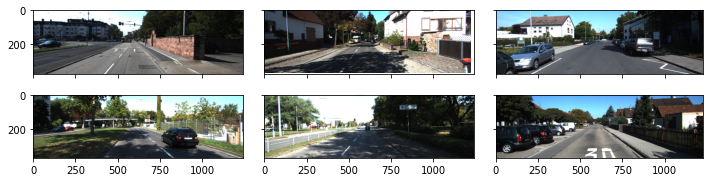

In [ ]:
#training images
show_image_grid(train_length)

384


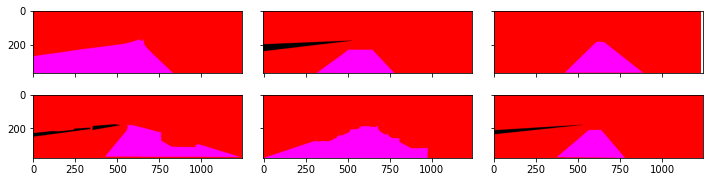

In [ ]:
#training ground truth images
train_gt = glob("rseg_data/data_road/training/gt_image_2/*.png")
print(len(train_gt))
show_image_grid(train_gt)

Ground truth total images do not match total training images. Match normal images with their ground truth images using names

In [ ]:
##Create a csv file of images and their directory
#There are three classes, urban unmarked,urban marked and urban multiple marked
#Create a path column, a label column with all three labels.
#Ground truth is of format "class" _ "lane/road" _ "img number"
#Raw image is of format "class" _ "img number"

Using Regular expressions

In [ ]:
#Ground truth is of format "class" _ "lane/road" _ "img number"
#Raw image is of format "class" _ "img number"
import re

In [ ]:
um= []
uu = []
umm = []
pattern = r"rseg_data/data_road/training/image_2/"
for img_p in train_length:
  #Removing pattern from img_p
  img_p_mod = re.sub(pattern,'',img_p)
  
  if re.search("^umm.*png",img_p_mod):
    umm.append(img_p)

  elif re.search("^uu.*png",img_p_mod):
    uu.append(img_p)

  elif re.search("^um.*png",img_p_mod):
    um.append(img_p)


print(len(um))
#print(um)
print(len(uu))
#print(uu)
print(len(umm))
#print(umm)


95
98
96


In [ ]:
#Ground truth
um_gt= []
uu_gt = []
umm_gt = []
pattern = r"rseg_data/data_road/training/gt_image_2/"
for img_p in train_gt:
  #Removing pattern from img_p
  img_p_mod = re.sub(pattern,'',img_p)
  
  if re.search("^umm.*png",img_p_mod):
    umm_gt.append(img_p)

  elif re.search("^uu.*png",img_p_mod):
    uu_gt.append(img_p)

  elif re.search("^um.*png",img_p_mod):
    um_gt.append(img_p)


print(len(um_gt))
#print(um_gt)
print(len(uu_gt))
#print(uu_gt)
print(len(umm_gt))
#print(umm_gt)

190
98
96


The Urban Marked Class is observed to have an extra 95 entries in the ground truth directory. This is because there are doubles for each entry where "um_lane" represents just a mask of the lane whereas "um_road" represents masks of both road and lane.

Hence, for urban marked class, using "um_road" images will suffice

In [ ]:
#csv file with columns having a generated id, path to the images and class or label and path to label
import pandas as pd

In [ ]:
print(um_gt)

['rseg_data/data_road/training/gt_image_2/um_lane_000088.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000059.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000063.png', 'rseg_data/data_road/training/gt_image_2/um_road_000007.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000060.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000007.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000090.png', 'rseg_data/data_road/training/gt_image_2/um_road_000042.png', 'rseg_data/data_road/training/gt_image_2/um_road_000083.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000027.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000017.png', 'rseg_data/data_road/training/gt_image_2/um_road_000093.png', 'rseg_data/data_road/training/gt_image_2/um_road_000017.png', 'rseg_data/data_road/training/gt_image_2/um_lane_000011.png', 'rseg_data/data_road/training/gt_image_2/um_road_000064.png', 'rseg_data/data_road/training/gt_image_2/um_road_000033.png', 'rseg_d

In [ ]:
#Drop all images with format "um_lane"
um_gt_road = [img_p for img_p in um_gt if re.search("^um_road.*png",re.sub(pattern,'',img_p))]

In [ ]:
len(um_gt_road)

95

In [ ]:
print(sorted(um_gt_road))

['rseg_data/data_road/training/gt_image_2/um_road_000000.png', 'rseg_data/data_road/training/gt_image_2/um_road_000001.png', 'rseg_data/data_road/training/gt_image_2/um_road_000002.png', 'rseg_data/data_road/training/gt_image_2/um_road_000003.png', 'rseg_data/data_road/training/gt_image_2/um_road_000004.png', 'rseg_data/data_road/training/gt_image_2/um_road_000005.png', 'rseg_data/data_road/training/gt_image_2/um_road_000006.png', 'rseg_data/data_road/training/gt_image_2/um_road_000007.png', 'rseg_data/data_road/training/gt_image_2/um_road_000008.png', 'rseg_data/data_road/training/gt_image_2/um_road_000009.png', 'rseg_data/data_road/training/gt_image_2/um_road_000010.png', 'rseg_data/data_road/training/gt_image_2/um_road_000011.png', 'rseg_data/data_road/training/gt_image_2/um_road_000012.png', 'rseg_data/data_road/training/gt_image_2/um_road_000013.png', 'rseg_data/data_road/training/gt_image_2/um_road_000014.png', 'rseg_data/data_road/training/gt_image_2/um_road_000015.png', 'rseg_d

**Now creating a csv file with what has been gathered**

In [ ]:
#Sorting data
training_image = sorted([*uu,*um,*umm])
gt_image = sorted([*uu_gt,*um_gt_road,*umm_gt])
id =sorted([i for i in range(len(gt_image))])

In [ ]:
print(training_image)
print(f"Length: {len(training_image)}")

print(gt_image)
print(f"Length: {len(gt_image)}")

print(id)
print(f"Length: {len(id)}")

['rseg_data/data_road/training/image_2/um_000000.png', 'rseg_data/data_road/training/image_2/um_000001.png', 'rseg_data/data_road/training/image_2/um_000002.png', 'rseg_data/data_road/training/image_2/um_000003.png', 'rseg_data/data_road/training/image_2/um_000004.png', 'rseg_data/data_road/training/image_2/um_000005.png', 'rseg_data/data_road/training/image_2/um_000006.png', 'rseg_data/data_road/training/image_2/um_000007.png', 'rseg_data/data_road/training/image_2/um_000008.png', 'rseg_data/data_road/training/image_2/um_000009.png', 'rseg_data/data_road/training/image_2/um_000010.png', 'rseg_data/data_road/training/image_2/um_000011.png', 'rseg_data/data_road/training/image_2/um_000012.png', 'rseg_data/data_road/training/image_2/um_000013.png', 'rseg_data/data_road/training/image_2/um_000014.png', 'rseg_data/data_road/training/image_2/um_000015.png', 'rseg_data/data_road/training/image_2/um_000016.png', 'rseg_data/data_road/training/image_2/um_000017.png', 'rseg_data/data_road/traini

In [ ]:
#labels as well
um_l =[0]*len(um)
umm_l =[1]*len(umm)
uu_l =[2]*len(uu)
labels = sorted([*um_l,*umm_l,*uu_l])

In [ ]:
print(labels)
print(f"Length: {len(labels)}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Length: 289


In [ ]:
data = {"ID": id,
        "CLASS": labels,
        "IMG_PTH":training_image,
        "GT_IMG_PTH":gt_image}

final_data = pd.DataFrame(data=data)

In [ ]:
final_data.head()

,ID,CLASS,IMG_PTH,GT_IMG_PTH
0,0,0,rseg_data/data_road/training/image_2/um_000000...,rseg_data/data_road/training/gt_image_2/um_roa...
1,1,0,rseg_data/data_road/training/image_2/um_000001...,rseg_data/data_road/training/gt_image_2/um_roa...
2,2,0,rseg_data/data_road/training/image_2/um_000002...,rseg_data/data_road/training/gt_image_2/um_roa...
3,3,0,rseg_data/data_road/training/image_2/um_000003...,rseg_data/data_road/training/gt_image_2/um_roa...
4,4,0,rseg_data/data_road/training/image_2/um_000004...,rseg_data/data_road/training/gt_image_2/um_roa...


In [ ]:
storage_path = "drive/MyDrive/Road_segm/road_segm.csv"
final_data.to_csv(storage_path,index=False)

In [ ]:
##Watch YT on how U-Net is used in training,
##Select backbone model to use
##Use pytorch image segmentation library to build model
##Set configuration to be used
##Understand the size of the images you would need and why
##Build dataset and build model
##Train model and save at checkpoints